<hr>
<h1 style="text-align:center; color:black; background-color:skyblue;  padding:20px; border-radius:10px;"><b>DENGUE ANALYSIS </b></h1>
<h2 align  = "center"> Analyst: Maria Louizza B. Pajarillon </h2>
<HR></HR>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [7]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

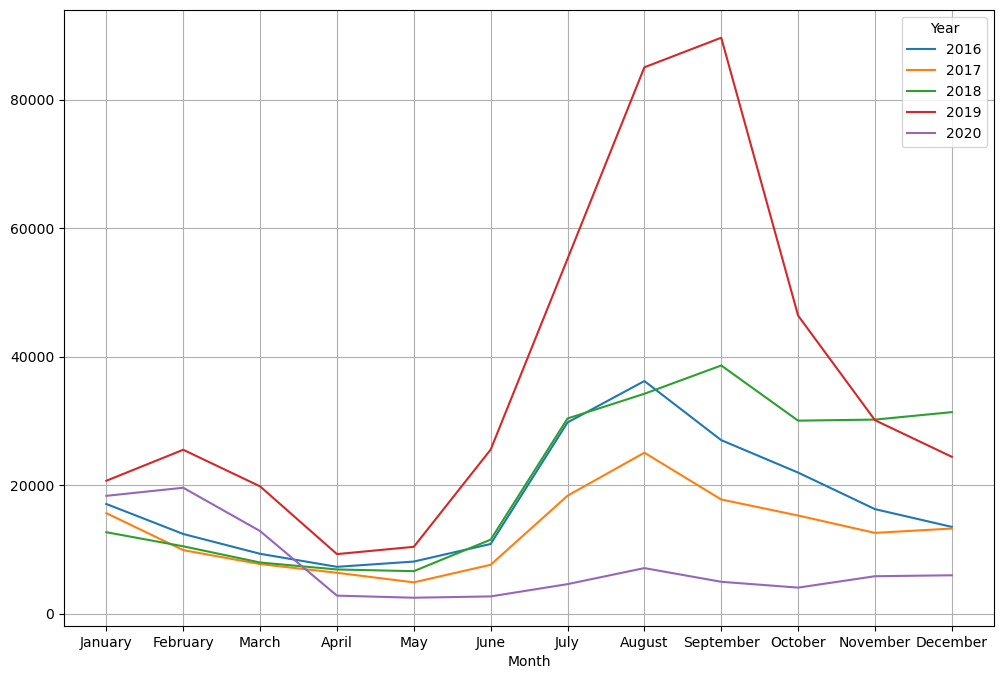

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> LINE PLOT WITH SEABORN </h1>

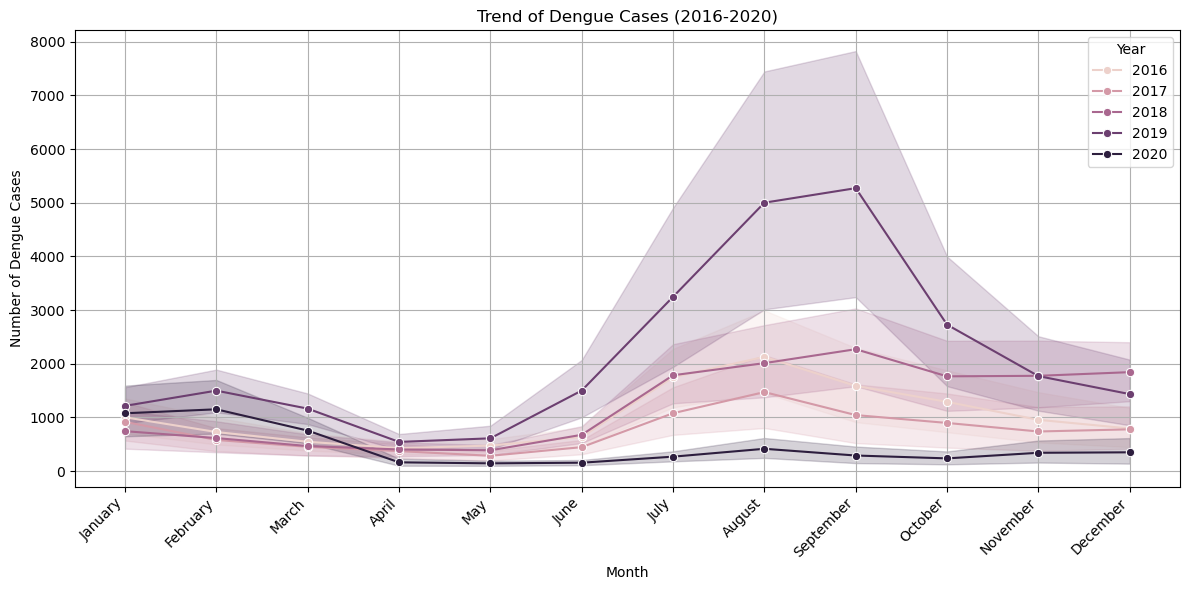

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

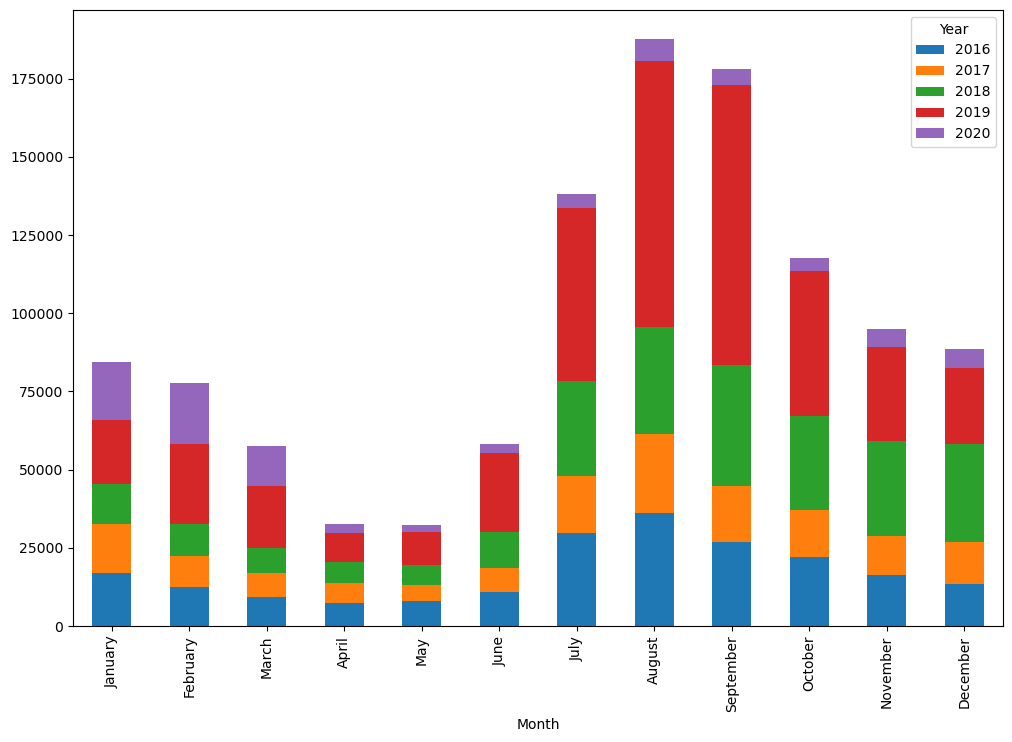

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

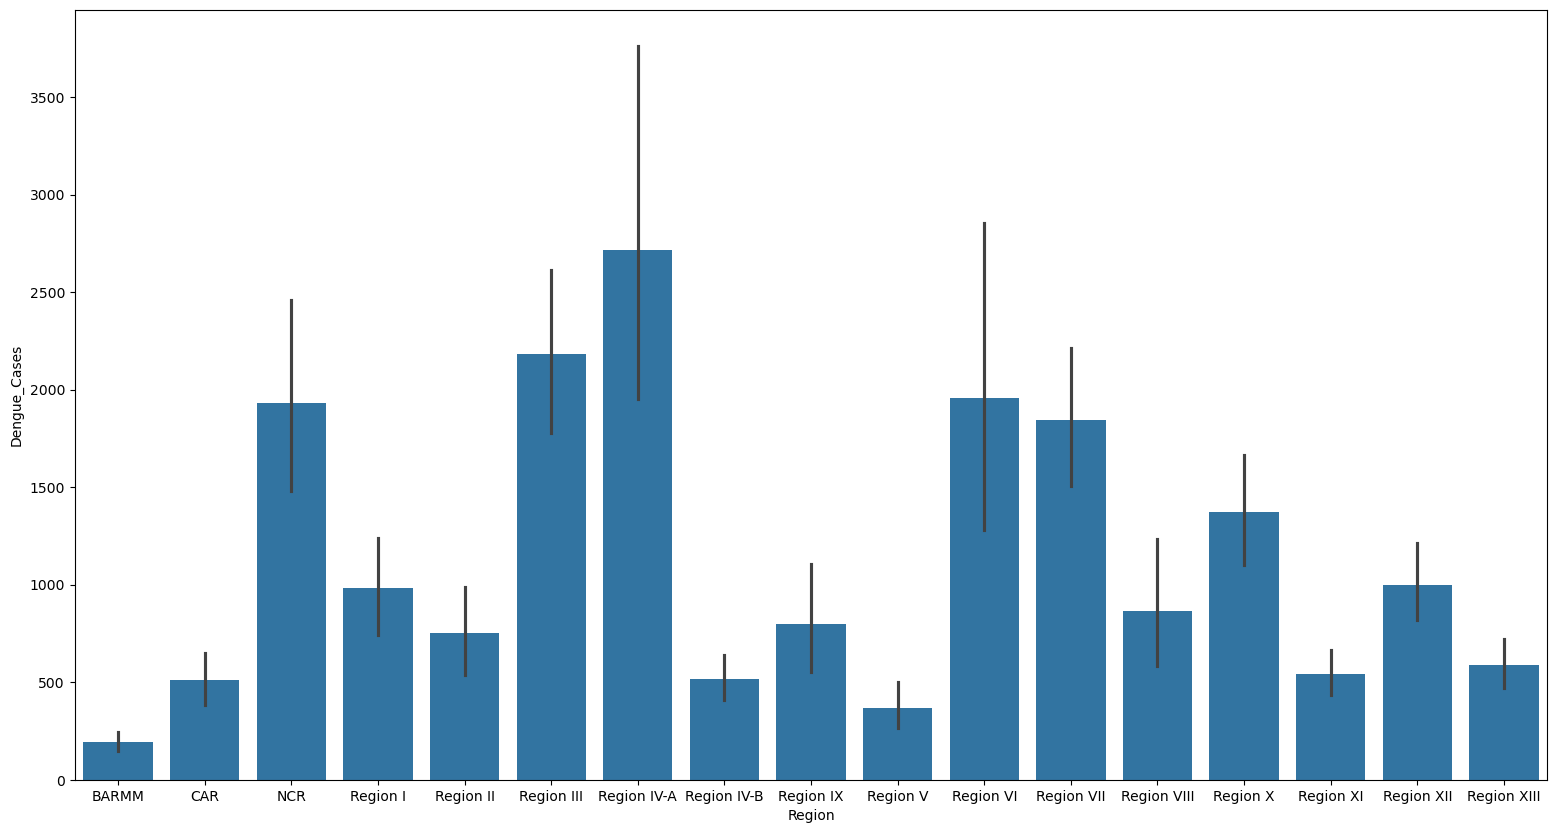

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [14]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [15]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [16]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


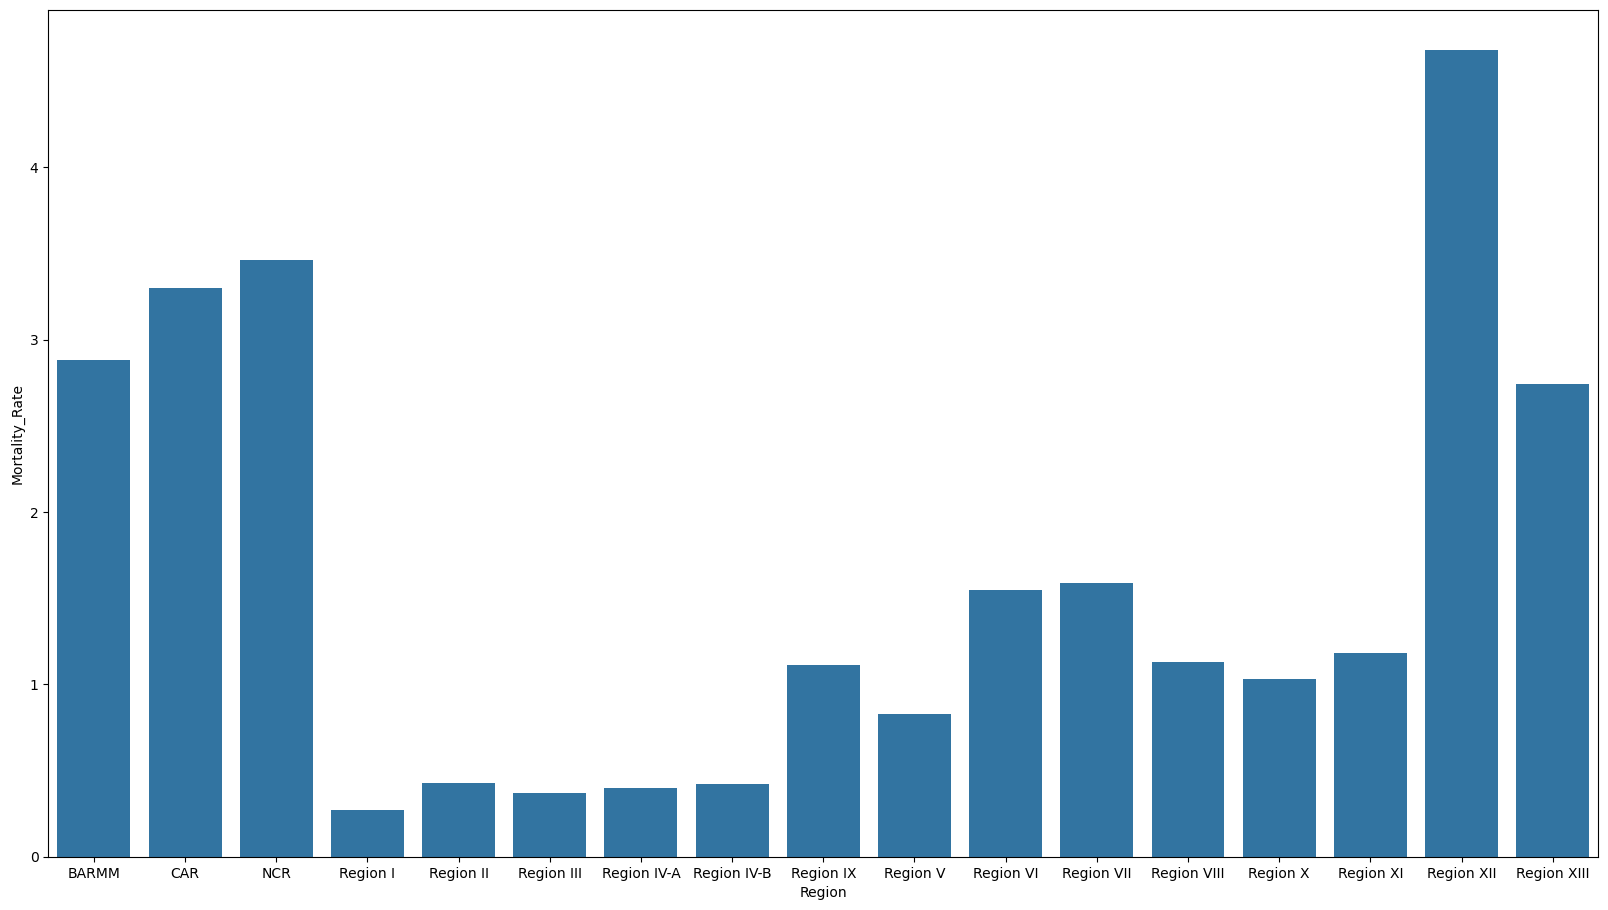

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

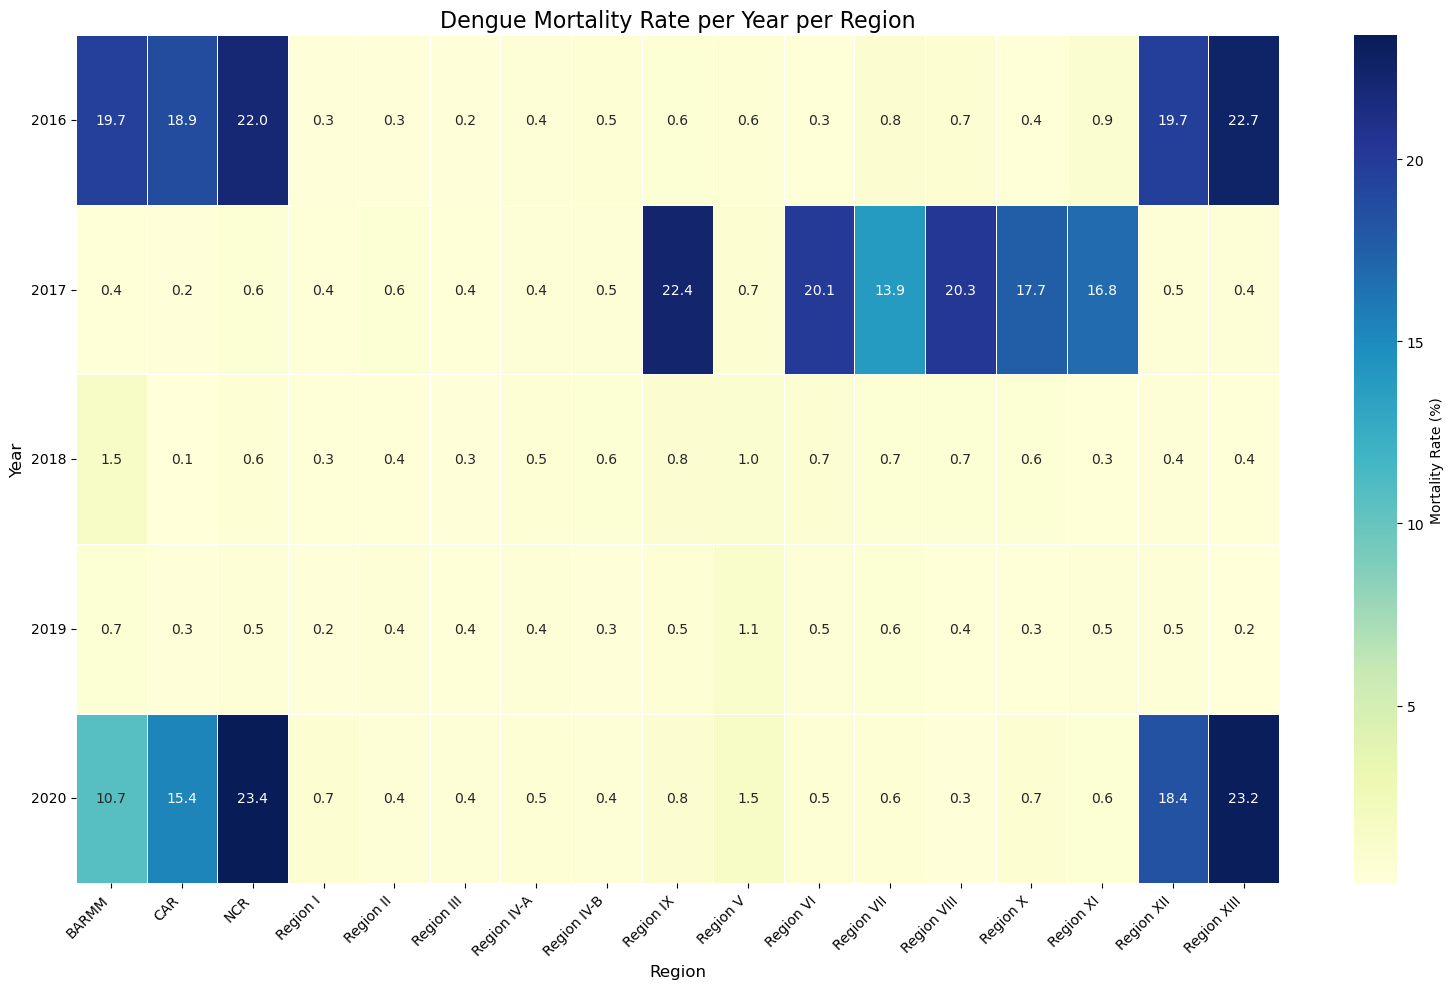

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [19]:
dengue['Month'] = dengue['Month'].astype('str')

In [20]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [21]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()


In [22]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
840,January,2016,NCR,1261,4,0.317209,2016-01-01
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01
120,January,2016,Region III,1976,3,0.151822,2016-01-01
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01
899,December,2020,NCR,658,4,0.607903,2020-12-01
59,December,2020,Region I,1081,1,0.092507,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal for regression
#monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(lambda x: x.toordinal())
#other 
monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_cases['Dengue_Cases'].values   #dependent variable 

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")


The model explains 1.7% of the variation in dengue cases.


In [24]:
monthly_cases

,Date,Dengue_Cases,Date_Ordinal,Predicted_Cases
0,2016-01-01,2993,735964,1946.568049
1,2016-02-01,2035,735995,1973.180297
2,2016-03-01,1327,736024,1998.075625
3,2016-04-01,838,736055,2024.687873
4,2016-05-01,714,736085,2050.441661
5,2016-06-01,778,736116,2077.053908
6,2016-07-01,2270,736146,2102.807696
7,2016-08-01,3218,736177,2129.419944
8,2016-09-01,3454,736208,2156.032191
9,2016-10-01,3175,736238,2181.785979


In [25]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
840,January,2016,NCR,1261,4,0.317209,2016-01-01
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01
120,January,2016,Region III,1976,3,0.151822,2016-01-01
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01
899,December,2020,NCR,658,4,0.607903,2020-12-01
59,December,2020,Region I,1081,1,0.092507,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01


In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


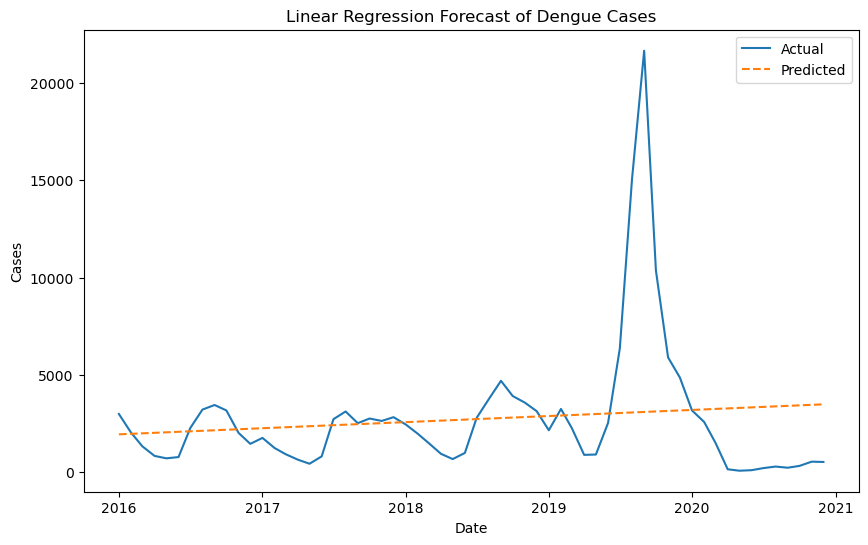

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_cases['Date'], monthly_cases['Dengue_Cases'], label='Actual')
plt.plot(monthly_cases['Date'], monthly_cases['Predicted_Cases'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()


<hr>
<h1 style="text-align:center; color:black; background-color:skyblue;  padding:20px; border-radius:10px;"><b>DENGUE ANALYSIS INSIGHT</b></h1>
<HR></HR>

<h1 ALIGN = "CENTER"> <b>DENGUE CASES TREND FROM <I>2016 - 2020</I </h1>

<h1><b>YEAR</h1>

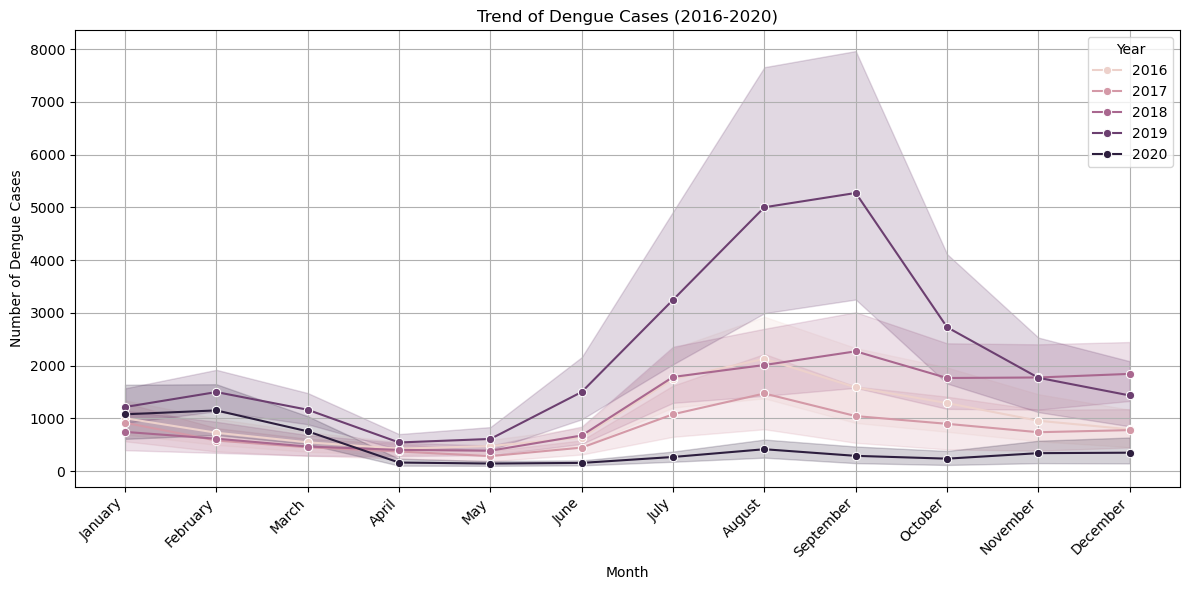

In [36]:
# using the example lineplot using seaborn from the example
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6)) #visualization using line plot
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

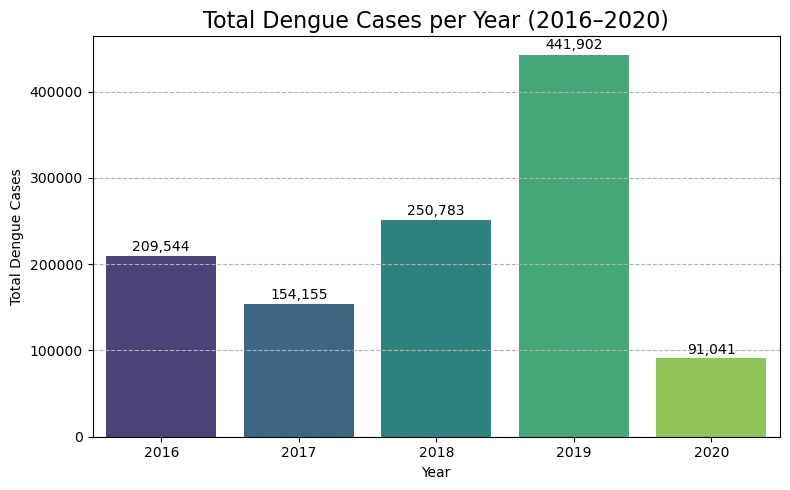

In [38]:
yearly_total = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index() #total yearly cases

plt.figure(figsize=(8, 5)) #visualization na bar plot
ax = sns.barplot(x='Year', y='Dengue_Cases', data=yearly_total, palette='viridis')

for i, v in enumerate(yearly_total['Dengue_Cases']): # Add the numbers above the bars (para hindi need ng another computation and graph para malaman exact numbers)
    ax.text(i, v + (v * 0.01), f"{v:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.title('Total Dengue Cases per Year (2016–2020)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


<hr>
<h1><b>INSIGHT NO.1</b></h1>
<h2><i>From the bar plot, we can conclude that the highest number of dengue cases was recorded in 2019, with a total of 441,902 cases. According to reports, there was a measles outbreak in 2019, which may have contributed to the spike in dengue cases that year, as both diseases strain the healthcare system and affect public health response. </h2>
<hr>
<h1><b>INSIGHT NO.2</b></h1>
<h2><i> In the line plot, the year 2019 shows a significant increase in dengue cases from June to September, reaching its peak in September. After that, the number of cases dropped sharply in October, indicating the end of the outbreak period.</h2>
<hr>
<h1><b>INSIGHT NO.3</b></h1>
<h2><i> As shown in the line plot, 2020 exhibited a stable and consistently low number of dengue cases across all months. This contrasts sharply with previous years that experienced significant peaks, particularly in 2019.</h2>
<hr>

<h1><b>MONTH</h1>

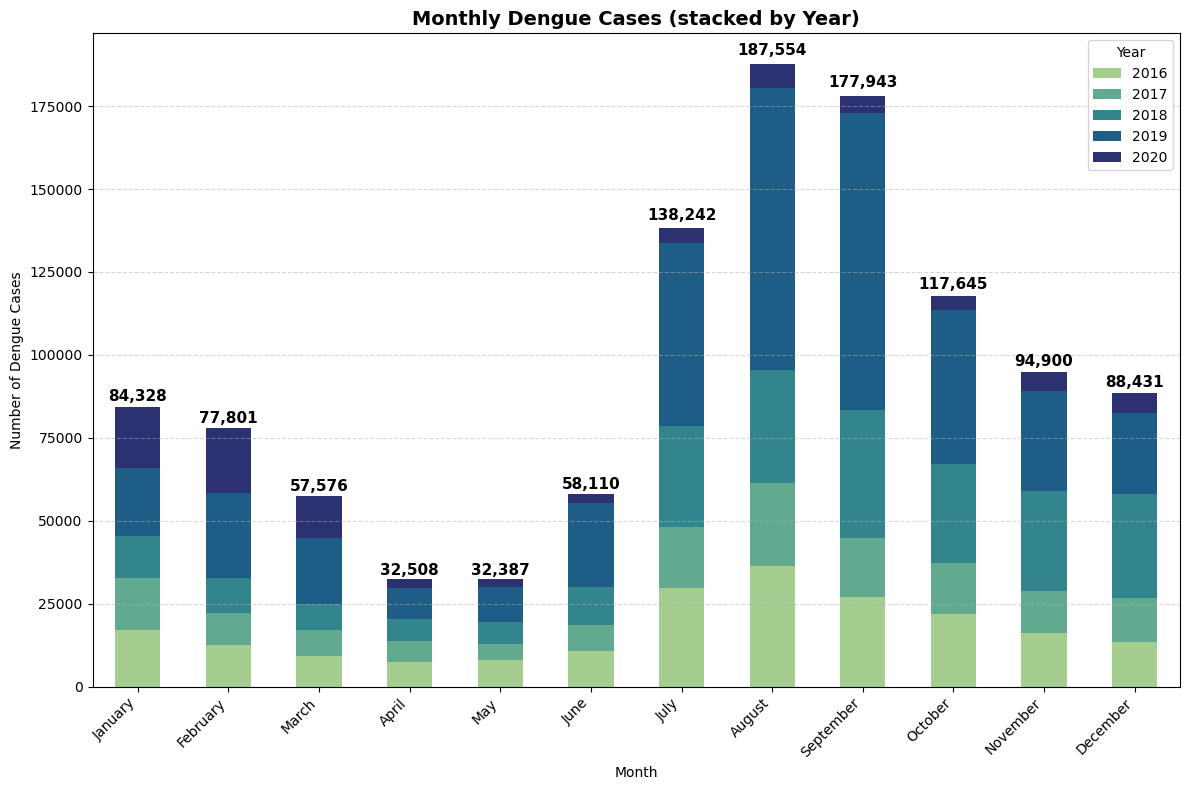

In [30]:
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_cases = (dengue.groupby(['Month','Year'])['Dengue_Cases'].sum().unstack(fill_value=0))
monthly_cases = monthly_cases.reindex(month_order).fillna(0)
monthly_total = monthly_cases.sum(axis=1).reset_index(name='Dengue_Cases')  #compuatation

ax = monthly_cases.plot(kind='bar', stacked=True, figsize=(12,8), colormap='crest') # vsisualization
totals = monthly_cases.sum(axis=1) #total ng per month

for i, total in enumerate(totals.values): # total ng per month para nakikita sa visualization
    ax.text(i, total + (total * 0.01), f"{int(total):,}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Monthly Dengue Cases (stacked by Year)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<hr>
<h1><b>INSIGHT NO.4</b></h1>
<h2><i>Based on the visualization, the highest number of dengue cases occurred in August and September, reaching approximately 187,554 and 177,943 total cases, respectively. This indicates that these months represent the peak period of dengue transmission across the years 2016–2020.</i></h2>
<hr>
<h1><b>INSIGHT NO.5</b></h1>
<h2><i>The months of April and May recorded the lowest number of dengue cases, with totals of around 32,000 each. This suggests a relatively stable period with minimal dengue activity during the early to mid-part of the year. </i></h2>
<hr>
<h1><b>INSIGHT NO.6</b></h1>
<h2><i>The trend clearly shows a gradual increase in cases from June to September, followed by a decline starting in October. This pattern suggests that dengue incidence is seasonal, with higher cases during the rainy months, which may contribute to the increased breeding of mosquitoes. </i></h2>
<hr>


<h1 align = "center" > <b> ANALYSIS OF DENGUE CASES <i>PER REGION </h1>

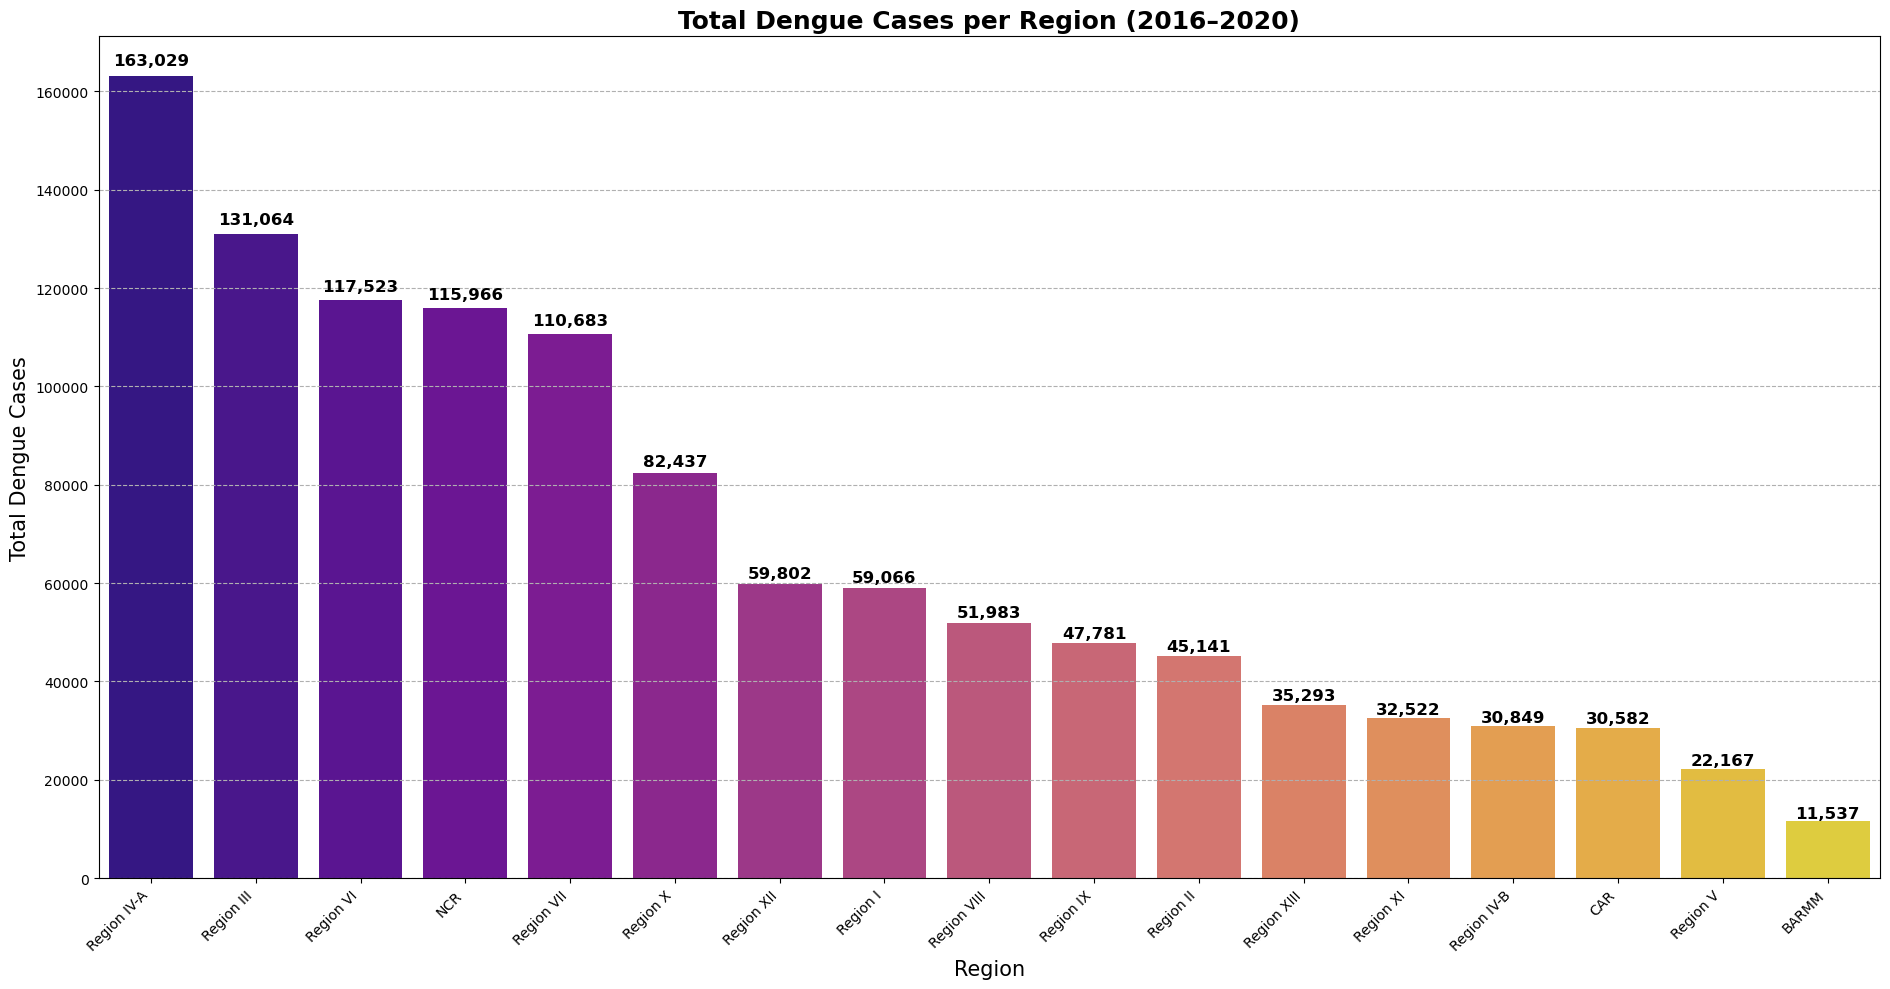

In [31]:
region_cases = dengue.groupby('Region', as_index=False)['Dengue_Cases'].sum()
region_cases = region_cases.sort_values(by='Dengue_Cases', ascending=False) # Sort high to low

plt.figure(figsize=(19,10)) # visualization
ax = sns.barplot(data=region_cases, x='Region', y='Dengue_Cases', palette='plasma', order=region_cases['Region'])

# total each region label per bar
for i, v in enumerate(region_cases['Dengue_Cases'].values):
    ax.text(i, v + (v * 0.01), f"{int(v):,}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Total Dengue Cases per Region (2016–2020)', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Dengue Cases', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--',)
plt.tight_layout()
plt.show()


<hr>
<h1><b>INSIGHT NO.7</b></h1>
<h2><i>The highest number of dengue cases was recorded in Region IV-A (CALABARZON) with a total of 163,029 cases, followed by Region III (Central Luzon) with 131,064 cases, and Region VI (Western Visayas) with 117,523 cases. These regions are among the most densely populated areas in the Philippines, which could explain the high number of reported cases. Urbanization, poor drainage systems, and high population density often create ideal breeding grounds for mosquitoes, contributing to the spread of dengue.</i></h2>
<hr>
<h1><b>INSIGHT NO.8</b></h1>
<h2><i>In contrast, the lowest number of dengue cases was recorded in BARMM (Bangsamoro Autonomous Region in Muslim Mindanao) with only 11,537 cases, followed by Region V (Bicol Region) with 22,167 cases, and CAR (Cordillera Administrative Region) with 30,582 cases.These regions generally have less urbanized and less crowded environments, which may have limited the spread of the dengue virus compared to more industrialized regions. </i></h2>
<hr>



<h1 align = "center"><b>MORTALITY RATE</h1>

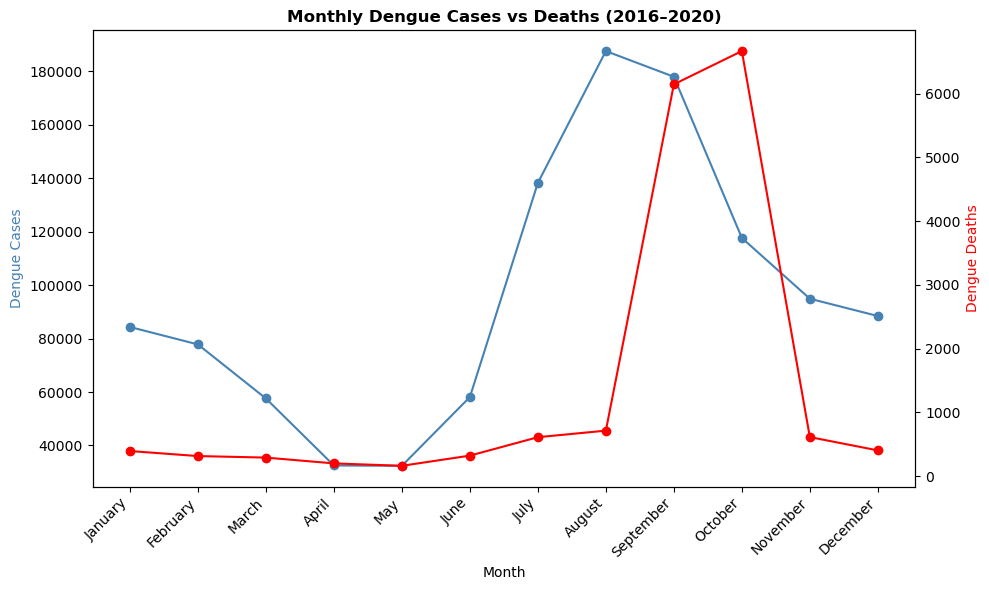

In [35]:
#visualization using Dual Axis View to see kung marami ang deaths sa naitalang cases sa months throghout the years
monthly = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
fig, cases_ax = plt.subplots(figsize=(10,6))
deaths_ax = cases_ax.twinx() #para umikot po yung name ng months sa baba since dual plot

cases_ax.plot(monthly["Month"], monthly["Dengue_Cases"], color="steelblue", marker="o", label="Cases")
deaths_ax.plot(monthly["Month"], monthly["Dengue_Deaths"], color="red", marker="o", label="Deaths")

cases_ax.set_xlabel("Month")
cases_ax.set_ylabel("Dengue Cases", color="steelblue")
deaths_ax.set_ylabel("Dengue Deaths", color="red")
plt.title("Monthly Dengue Cases vs Deaths (2016–2020)", fontweight="bold")

plt.setp(cases_ax.get_xticklabels(), rotation=45, ha='right')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<hr>
<h1><b>INSIGHT NO.9</b></h1>
<h2><i>Even though the highest recorded dengue cases occurred in August and September, the highest deaths were recorded in October, indicating no direct correlation between the number of cases and deaths. This suggests that fatalities may depend more on delayed treatment or outbreak severity rather than the case count alone.</i></h2>
<hr>
<h1><b>INSIGHT NO.10</b></h1>
<h2><i>From January to May, dengue cases and deaths stayed consistently low, with cases below 60,000 and deaths under 1,000. However, starting June, cases rose sharply, reaching over 180,000 in August, while deaths also increased and peaked in October. This pattern shows that dengue transmission intensifies during the mid to late rainy season, when stagnant water and humid conditions create ideal breeding grounds for mosquitoes, leading to a surge in infections and delayed fatal outcomes. </i></h2>
<hr>

